In [1]:
import pandas as pd
import numpy as np
import datetime as date
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the Train data set

In [2]:
df = pd.read_excel('data_excel/Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Display all columns

In [3]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### Data types of features

In [4]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### Handel NaNs

In [5]:
df.shape

(10683, 11)

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.dropna(inplace=True)

## Data Cleaning:

Make a copy of the data_set to store the cleaned data set

In [8]:
df_cleaned = df
df_cleaned.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [9]:
def get_unique_vals(df_cleaned,f_name):
    return list(df[f_name].unique())

### 1. Cleaning 'Total_Stops' feature
- All unique values of total_stops

In [10]:
unique_vals = get_unique_vals(df_cleaned,'Total_Stops')
print(unique_vals)

['non-stop', '2 stops', '1 stop', '3 stops', '4 stops']


- Convert **Total_Stops** to ***Str*** srtipping from 0 to 1 index.

In [11]:
df_cleaned.Total_Stops = df_cleaned.Total_Stops.apply(lambda stop:str(stop)[0:2].strip() if(pd.notnull(stop)) else stop)

- replace **'no'** with **'0'**.

In [12]:
df_cleaned.Total_Stops = df_cleaned.Total_Stops.apply(lambda stop:'0' if stop=='no' else stop)

- **Total_Stops** converted to **Str**.

In [13]:
df_cleaned.Total_Stops.head()

0    0
1    2
2    2
3    1
4    1
Name: Total_Stops, dtype: object

In [14]:
df_cleaned.Total_Stops = df_cleaned.Total_Stops.apply(lambda stop:np.int64(stop) if(pd.notnull(stop)) else stop)
df_cleaned.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


- get the **Unique** values

In [15]:
unique_vals = get_unique_vals(df_cleaned,'Total_Stops')
print(unique_vals)

[0, 2, 1, 3, 4]


In [16]:
df_cleaned.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops         int64
Additional_Info    object
Price               int64
dtype: object

- Thus, **Total_Stops** feature is ***cleaned and properly formatted***!

### 2. Cleaning 'Additional_Info' feature

In [17]:
unique_vals = get_unique_vals(df_cleaned,'Additional_Info')
print(unique_vals)

['No info', 'In-flight meal not included', 'No check-in baggage included', '1 Short layover', 'No Info', '1 Long layover', 'Change airports', 'Business class', 'Red-eye flight', '2 Long layover']


In [18]:
df_cleaned.Additional_Info = df_cleaned.Additional_Info.replace('No info','No Info')

In [19]:
unique_vals = get_unique_vals(df_cleaned,'Additional_Info')
print(unique_vals)

['No Info', 'In-flight meal not included', 'No check-in baggage included', '1 Short layover', '1 Long layover', 'Change airports', 'Business class', 'Red-eye flight', '2 Long layover']


In [20]:
df_cleaned.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No Info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No Info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No Info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No Info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No Info,13302


Thus, **Additional_Info feature is cleaned**

Create a file: **cleaned_data.csv** to store the DataFrame **df_cleaned**

In [21]:
df_cleaned.to_excel('cleaned_data.xlsx')

In [22]:
cleaned_data = pd.read_excel('cleaned_data.xlsx', usecols=['Airline','Date_of_Journey','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info','Price'])

In [23]:
cleaned_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No Info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No Info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No Info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No Info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No Info,13302


# EDA

- get the day
- get the month
- the dataset is only for year 2019

In [24]:
cleaned_data['journey_day'] = pd.to_datetime(cleaned_data.Date_of_Journey,format='%d/%m/%Y').dt.day

In [25]:
cleaned_data['journey_month'] = pd.to_datetime(cleaned_data.Date_of_Journey,format='%d/%m/%Y').dt.month

In [26]:
pd.to_datetime(cleaned_data.Date_of_Journey,format='%d/%m/%Y').dt.year.unique()

array([2019], dtype=int32)

- drop the Date_of_Journey feature

In [27]:
cleaned_data.drop(['Date_of_Journey'],axis='columns',inplace=True)

In [28]:
cleaned_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No Info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No Info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No Info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No Info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No Info,13302,1,3


In [29]:
cleaned_data.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops         int64
Additional_Info    object
Price               int64
journey_day         int32
journey_month       int32
dtype: object

#### Turns out that all but Price are Categorical features, and they need to be brought to Int type. So, we need to perform some kind of encoding technique to resolve this issue.

### Count the no. of unique values in each column

In [30]:
for col in cleaned_data.columns:
    print(col,':',len(cleaned_data[col].unique()))

Airline : 12
Source : 5
Destination : 6
Route : 128
Dep_Time : 222
Arrival_Time : 1343
Duration : 368
Total_Stops : 5
Additional_Info : 9
Price : 1870
journey_day : 10
journey_month : 4


In [31]:
pd.get_dummies(cleaned_data,drop_first=True).shape

(10682, 2089)

Inorder to handel these categorical features If we apply the One Hot Encoding technique then we'll have 2089 features(including the categorical ones) which is NOT feasable as this is computationally expensive and might very well lead to ***The curse of Dimensionality***

So, If we apply One hot encoding(to handel categorical features), then we have to take top x(say a no.) most frequent occurance of each category in some features. In this way we can avoid ***The curse of Dimensionality***, and also reduce the no. of features to a significant value.

### Some notes:
Since One Hot Encoding is applied only for **Nominal features** so we've to identify which of them are **Nominal features**.
1. **Airline, Source, Destination** - the order of categories in these features cannot be ranked.

/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

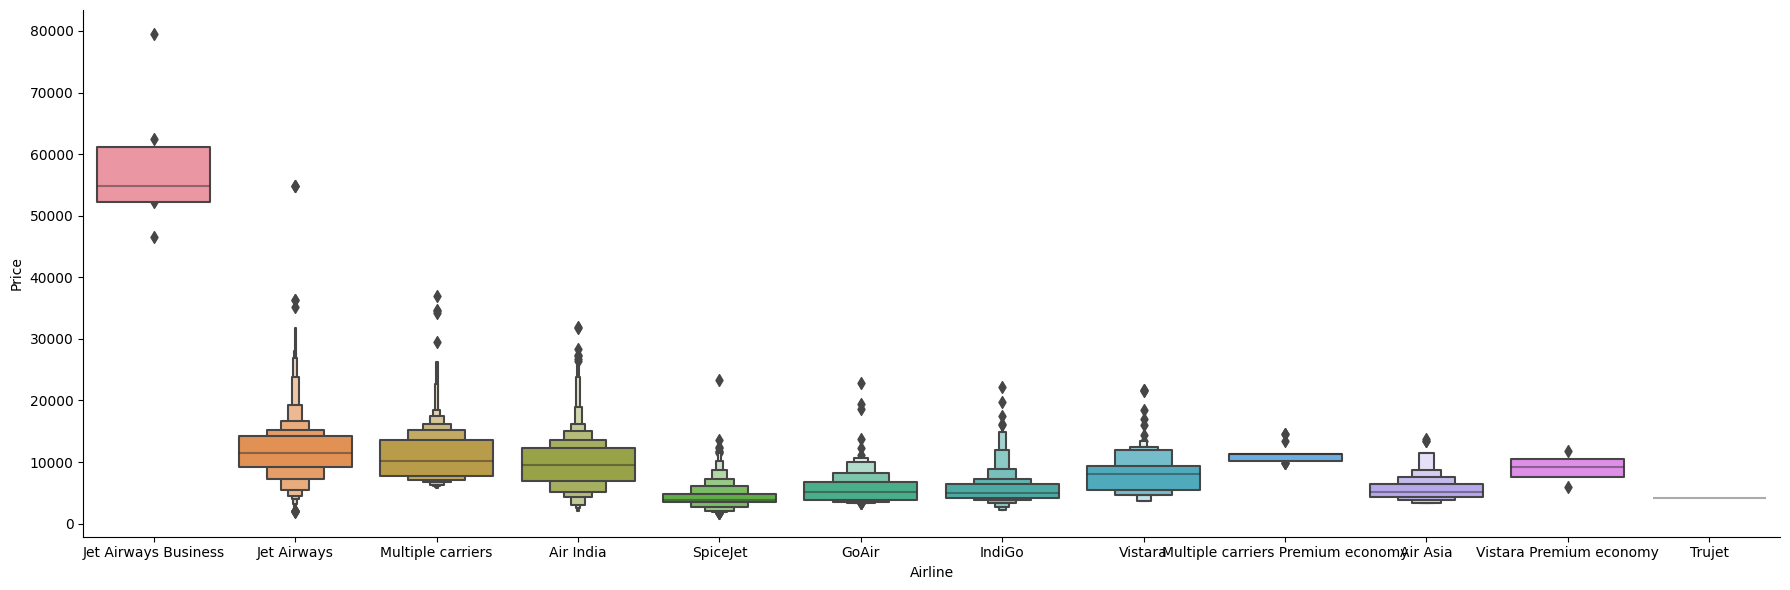

In [32]:
sns.catplot(y = 'Price',x = 'Airline', data=cleaned_data.sort_values('Price',ascending=False), kind='boxen', height=6, aspect=3)

/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

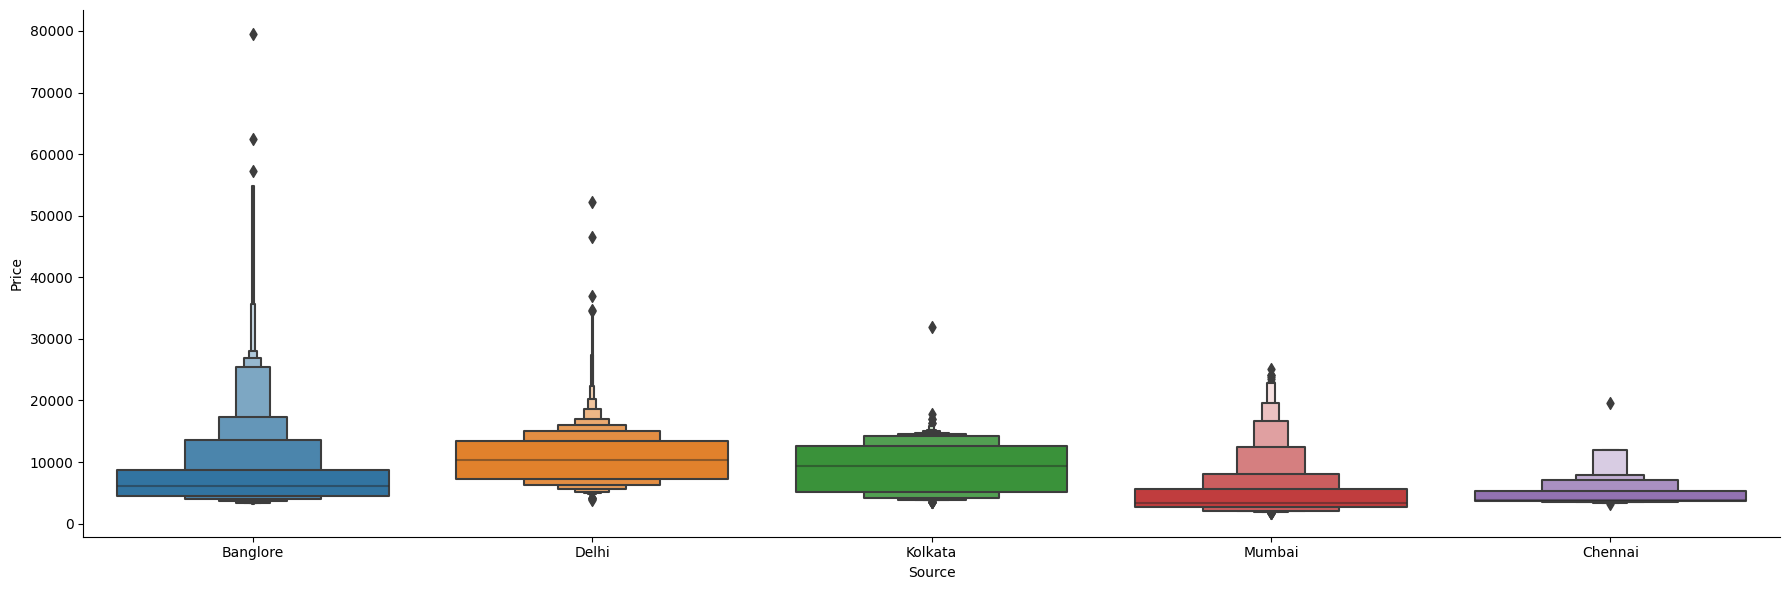

In [33]:
sns.catplot(y = 'Price',x = 'Source', data=cleaned_data.sort_values('Price',ascending=False), kind='boxen', height=6, aspect=3)

/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

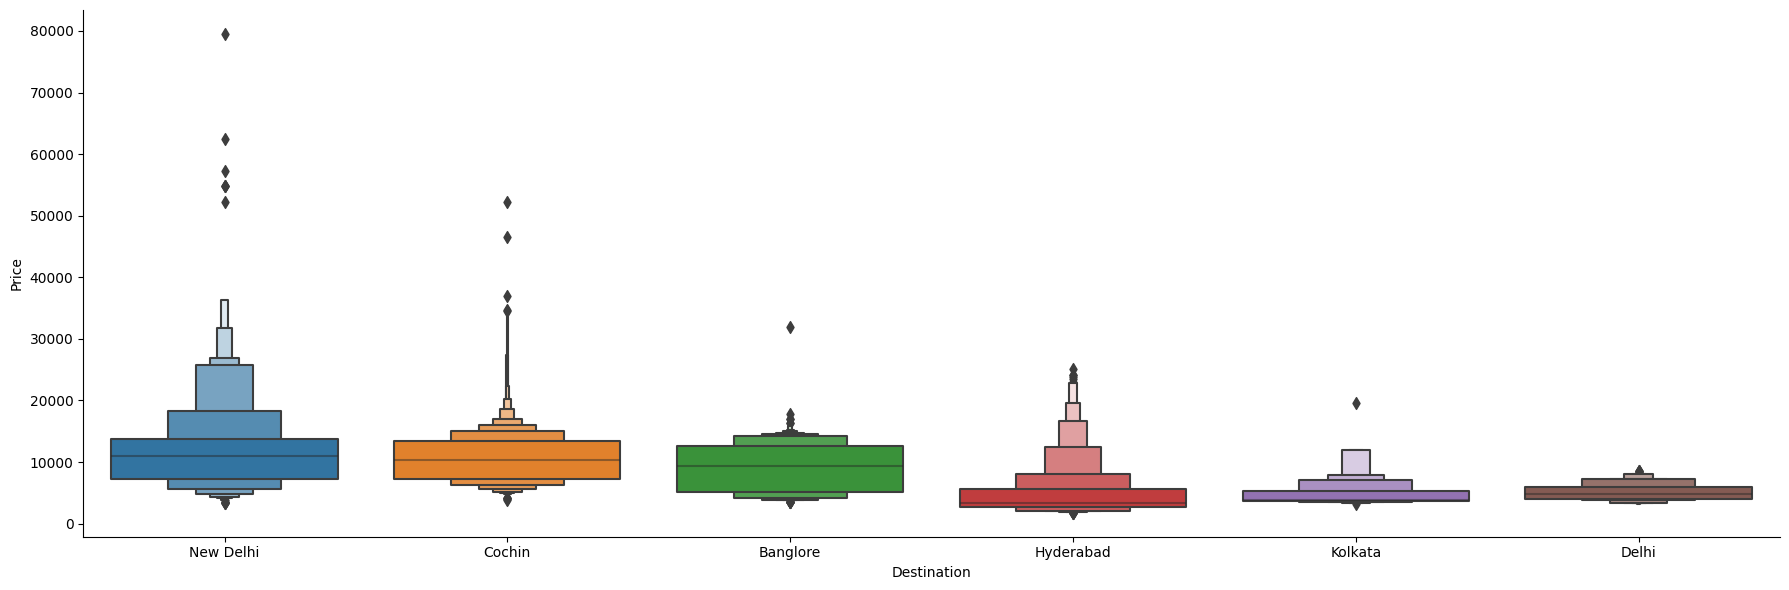

In [34]:
sns.catplot(y = 'Price',x = 'Destination', data=cleaned_data.sort_values('Price',ascending=False), kind='boxen', height=6, aspect=3)

- let's drop Destination & Source features, since they don't effect the flight fare much.

- From the above catplot we can see that **Airline, Source, and Destination** are Nominal data; i.e they can't be ranked based even w.r.t the **Price** of the flight.
- Except for the **Jet Airways Business** Airline which here seems as an outlier.
- So, we can perform One Hot Encoding for **Airline, Source, and Destination** features.

In [35]:
pd.get_dummies(cleaned_data[['Airline','Source','Destination']],drop_first=True).shape

(10682, 20)

So, from the above output if we perform OHE(One Hot Encoding) on the above features the only 20 features will be added, which is a considerable amount OR **NOT computationally expensive** as compared to the previous one.

In [36]:
# encoded_data = pd.get_dummies(cleaned_data[['Airline','Source','Destination']],drop_first=True)
from sklearn.preprocessing import LabelEncoder
final_data=cleaned_data.copy()
#Encode Airline, Source and Destination
le = LabelEncoder()
final_data['Airline'] = le.fit_transform(final_data['Airline'])
final_data['Source'] = le.fit_transform(final_data['Source'])
final_data['Destination'] = le.fit_transform(final_data['Destination'])

In [37]:
# final_data = pd.concat([cleaned_data,encoded_data],axis=1)

In [38]:
final_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,3,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No Info,3897,24,3
1,1,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No Info,7662,1,5
2,4,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No Info,13882,9,6
3,3,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No Info,6218,12,5
4,3,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No Info,13302,1,3


In [39]:
final_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'journey_day',
       'journey_month'],
      dtype='object')

- drop **Airline, Source, & Destination** features

In [40]:
final_data.drop(['Airline'],axis=1,inplace=True)

In [41]:
final_data.drop(['Source','Destination'],axis=1,inplace=True)

In [42]:
final_data.head()

,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No Info,3897,24,3
1,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No Info,7662,1,5
2,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No Info,13882,9,6
3,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No Info,6218,12,5
4,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No Info,13302,1,3


In [43]:
final_data['dep_hour'] = pd.to_datetime(final_data.Dep_Time,format='%H:%M').dt.hour

In [44]:
final_data['dep_mins'] = pd.to_datetime(final_data.Dep_Time,format='%H:%M').dt.minute

In [45]:
final_data.head()

,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_mins
0,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No Info,3897,24,3,22,20
1,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No Info,7662,1,5,5,50
2,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No Info,13882,9,6,9,25
3,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No Info,6218,12,5,18,5
4,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No Info,13302,1,3,16,50


- We've extracted the **hour** & **mins** from the **Dep_Time** feature
- Now drop the **Dep_Time** feature.

In [46]:
final_data.drop(['Dep_Time'],axis=1,inplace=True)
final_data.head()

,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_mins
0,BLR → DEL,01:10 22 Mar,2h 50m,0,No Info,3897,24,3,22,20
1,CCU → IXR → BBI → BLR,13:15,7h 25m,2,No Info,7662,1,5,5,50
2,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2,No Info,13882,9,6,9,25
3,CCU → NAG → BLR,23:30,5h 25m,1,No Info,6218,12,5,18,5
4,BLR → NAG → DEL,21:35,4h 45m,1,No Info,13302,1,3,16,50


In [47]:
ih = final_data.Duration[0].index('h')
im = final_data.Duration[0].index('m')
print(final_data.Duration[0][:ih])
print(final_data.Duration[0][ih+2:im])

2
50


- Calculate the maximum duration of the journey in the entire dataset

In [48]:
durations = []
duration_hour = []
duration_min = []
l = len(final_data.Duration)
for i in range(0,l):
    if('m' not in final_data.Duration[i]):
        index_hour = final_data.Duration[i].index('h')
        hour = int(final_data.Duration[i][:index_hour])
        duration_hour.append(hour)
        duration_min.append(0)
    elif('h' not in final_data.Duration[i]):
        index_min = final_data.Duration[i].index('m')
        mins = int(final_data.Duration[i][:index_min])
        duration_min.append(mins)
        duration_hour.append(0)
    else:
        index_hour = final_data.Duration[i].index('h')
        index_min = final_data.Duration[i].index('m')
        hour = int(final_data.Duration[i][:index_hour])
        mins = int(final_data.Duration[i][index_hour+2:index_min])
        duration_hour.append(hour)
        duration_min.append(mins)
        
duration_hour = pd.Series(duration_hour)
duration_hour.name = 'duration_hour'
duration_min = pd.Series(duration_min)
duration_min.name = 'duration_min'
print(duration_hour.head())
print(duration_min.head())

0     2
1     7
2    19
3     5
4     4
Name: duration_hour, dtype: int64
0    50
1    25
2     0
3    25
4    45
Name: duration_min, dtype: int64


- Since max Duration is of 2 days approx, means that we can remove the month name from the **Arrival_Time** feature for those that have it. 

- formatting the **Arrival_Time** feature

In [49]:
arrival_day = []
for i in range(0,l):
    arrival = final_data.Arrival_Time[i]
    if(' ' in arrival):
        f_space_index = arrival.index(' ')
        l_space_index = arrival.rfind(' ')
        arrival_day.append(int(arrival[f_space_index+1:l_space_index]))
#         strip off the month name(No longer needed).
#         final_data.loc[[final_data.Arrival_Time[i]]] = arrival[:f_space_index]
        final_data.Arrival_Time[i] = arrival[:f_space_index]
    else:
        arrival_day.append(final_data.journey_day[i])
arrival_day = pd.Series(arrival_day)
arrival_day.name = 'arrival_day'
arrival_day.head()

/tmp/ipykernel_18549/519837667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.Arrival_Time[i] = arrival[:f_space_index]
/tmp/ipykernel_18549/519837667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.Arrival_Time[i] = arrival[:f_space_index]
/tmp/ipykernel_18549/519837667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.Arrival_Time[i] = arrival[:f_space_index]
/tmp/ipykernel_18549/5198376

/tmp/ipykernel_18549/519837667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.Arrival_Time[i] = arrival[:f_space_index]
/tmp/ipykernel_18549/519837667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.Arrival_Time[i] = arrival[:f_space_index]
/tmp/ipykernel_18549/519837667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.Arrival_Time[i] = arrival[:f_space_index]
/tmp/ipykernel_18549/5198376

0    22
1     1
2    10
3    12
4     1
Name: arrival_day, dtype: int64

In [50]:
final_data.head()

,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_mins
0,BLR → DEL,01:10,2h 50m,0,No Info,3897,24,3,22,20
1,CCU → IXR → BBI → BLR,13:15,7h 25m,2,No Info,7662,1,5,5,50
2,DEL → LKO → BOM → COK,04:25,19h,2,No Info,13882,9,6,9,25
3,CCU → NAG → BLR,23:30,5h 25m,1,No Info,6218,12,5,18,5
4,BLR → NAG → DEL,21:35,4h 45m,1,No Info,13302,1,3,16,50


In [51]:
final_data = pd.concat([final_data,arrival_day],axis=1)

In [52]:
final_data.head()

,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_mins,arrival_day
0,BLR → DEL,01:10,2h 50m,0,No Info,3897,24,3,22,20,22
1,CCU → IXR → BBI → BLR,13:15,7h 25m,2,No Info,7662,1,5,5,50,1
2,DEL → LKO → BOM → COK,04:25,19h,2,No Info,13882,9,6,9,25,10
3,CCU → NAG → BLR,23:30,5h 25m,1,No Info,6218,12,5,18,5,12
4,BLR → NAG → DEL,21:35,4h 45m,1,No Info,13302,1,3,16,50,1


In [53]:
final_data['arrival_hour'] = pd.to_datetime(final_data.Arrival_Time,format='%H:%M').dt.hour

In [54]:
final_data['arrival_min'] = pd.to_datetime(final_data.Arrival_Time,format='%H:%M').dt.minute

In [55]:
final_data.head()

,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_mins,arrival_day,arrival_hour,arrival_min
0,BLR → DEL,01:10,2h 50m,0,No Info,3897,24,3,22,20,22,1,10
1,CCU → IXR → BBI → BLR,13:15,7h 25m,2,No Info,7662,1,5,5,50,1,13,15
2,DEL → LKO → BOM → COK,04:25,19h,2,No Info,13882,9,6,9,25,10,4,25
3,CCU → NAG → BLR,23:30,5h 25m,1,No Info,6218,12,5,18,5,12,23,30
4,BLR → NAG → DEL,21:35,4h 45m,1,No Info,13302,1,3,16,50,1,21,35


In [56]:
final_data = pd.concat([final_data,duration_hour,duration_min],axis=1)

In [57]:
final_data.head()

,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_mins,arrival_day,arrival_hour,arrival_min,duration_hour,duration_min
0,BLR → DEL,01:10,2h 50m,0,No Info,3897,24,3,22,20,22,1,10,2,50
1,CCU → IXR → BBI → BLR,13:15,7h 25m,2,No Info,7662,1,5,5,50,1,13,15,7,25
2,DEL → LKO → BOM → COK,04:25,19h,2,No Info,13882,9,6,9,25,10,4,25,19,0
3,CCU → NAG → BLR,23:30,5h 25m,1,No Info,6218,12,5,18,5,12,23,30,5,25
4,BLR → NAG → DEL,21:35,4h 45m,1,No Info,13302,1,3,16,50,1,21,35,4,45


- Drop the **Arrival_Time & Duration** features

In [58]:
final_data.drop(['Arrival_Time','Duration'],axis=1,inplace=True)
final_data.head()

,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_mins,arrival_day,arrival_hour,arrival_min,duration_hour,duration_min
0,BLR → DEL,0,No Info,3897,24,3,22,20,22,1,10,2,50
1,CCU → IXR → BBI → BLR,2,No Info,7662,1,5,5,50,1,13,15,7,25
2,DEL → LKO → BOM → COK,2,No Info,13882,9,6,9,25,10,4,25,19,0
3,CCU → NAG → BLR,1,No Info,6218,12,5,18,5,12,23,30,5,25
4,BLR → NAG → DEL,1,No Info,13302,1,3,16,50,1,21,35,4,45


In [59]:
final_data.Additional_Info.value_counts()

Additional_Info
No Info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

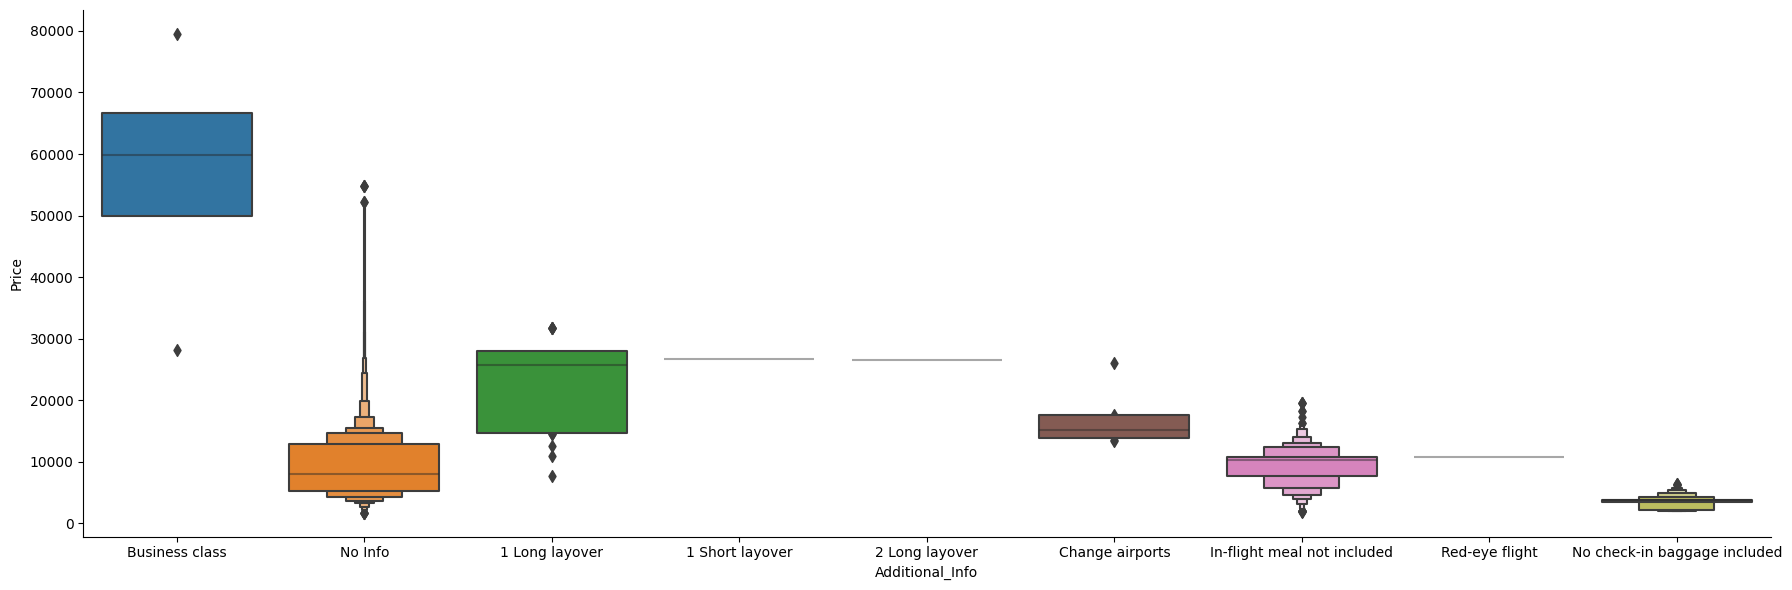

In [60]:
sns.catplot(y='Price', x='Additional_Info', data=final_data.sort_values('Price',ascending=False), kind='boxen', height=6, aspect=3)

- *No Info* feature is present 8347 times! and this does not effect the fare of the flight.
- *In-flight meal not included* is present 1982 times! which also doesn't effect the fare.
- *No check-in baggage included* is present 320 times! which also doesn't effect the fare.
- From the above plot it's clear that **Additional_Info** is a Nominal data except the **Business class** category which has occured only 7 times in 10,000 rows!
- So, it's almost negligible, OR **Business class** has almost no effect in the price of the flight.
- This means that we can safely drop the *Additional_Info* feature.

In [61]:
final_data.drop(['Additional_Info'],axis=1,inplace=True)

In [62]:
final_data.head()

,Route,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_mins,arrival_day,arrival_hour,arrival_min,duration_hour,duration_min
0,BLR → DEL,0,3897,24,3,22,20,22,1,10,2,50
1,CCU → IXR → BBI → BLR,2,7662,1,5,5,50,1,13,15,7,25
2,DEL → LKO → BOM → COK,2,13882,9,6,9,25,10,4,25,19,0
3,CCU → NAG → BLR,1,6218,12,5,18,5,12,23,30,5,25
4,BLR → NAG → DEL,1,13302,1,3,16,50,1,21,35,4,45


In [63]:
final_data.columns

Index(['Route', 'Total_Stops', 'Price', 'journey_day', 'journey_month',
       'dep_hour', 'dep_mins', 'arrival_day', 'arrival_hour', 'arrival_min',
       'duration_hour', 'duration_min'],
      dtype='object')

- Let's analyse the **Route** feature.

In [64]:
final_data.Route.value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [65]:
final_data.sort_values('Price',ascending=False)

,Route,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_mins,arrival_day,arrival_hour,arrival_min,duration_hour,duration_min
2924,BLR → BOM → DEL,1,79512,1,3,5,45,1,11,25,5,40
5372,BLR → BOM → DEL,1,62427,1,3,5,45,1,12,25,6,40
10363,BLR → MAA → DEL,1,57209,1,3,9,45,1,14,25,4,40
1478,BLR → BOM → DEL,1,54826,18,3,18,40,16,0,45,6,5
5439,BLR → BOM → DEL,1,54826,1,3,16,55,1,23,0,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1513,BOM → HYD,0,1840,27,3,2,55,27,4,25,1,30
4066,BOM → HYD,0,1759,21,3,22,45,22,0,10,1,25
10512,BOM → HYD,0,1759,27,3,5,45,27,7,5,1,20
4274,BOM → HYD,0,1759,27,3,22,45,28,0,10,1,25


- The encoding of the **Route** feature can only be sensical with it's length OR the total no. of Stops, which has already been encoded in the **Total_Stops** feature.
- So, we can drop the **Route** feature.

In [66]:
final_data.drop(['Route'],axis=1,inplace=True)

In [67]:
final_data.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_mins,arrival_day,arrival_hour,arrival_min,duration_hour,duration_min
0,0,3897,24,3,22,20,22,1,10,2,50
1,2,7662,1,5,5,50,1,13,15,7,25
2,2,13882,9,6,9,25,10,4,25,19,0
3,1,6218,12,5,18,5,12,23,30,5,25
4,1,13302,1,3,16,50,1,21,35,4,45


In [68]:
total_stops = final_data.pop('Total_Stops')

In [69]:
final_data.insert(len(final_data.columns) ,'Total_Stops', total_stops)

In [70]:
price = final_data.pop('Price')

In [71]:
final_data.insert(len(final_data.columns) ,'Price', price)

In [72]:
final_data.head()

,journey_day,journey_month,dep_hour,dep_mins,arrival_day,arrival_hour,arrival_min,duration_hour,duration_min,Total_Stops,Price
0,24,3,22,20,22,1,10,2,50,0,3897
1,1,5,5,50,1,13,15,7,25,2,7662
2,9,6,9,25,10,4,25,19,0,2,13882
3,12,5,18,5,12,23,30,5,25,1,6218
4,1,3,16,50,1,21,35,4,45,1,13302


/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

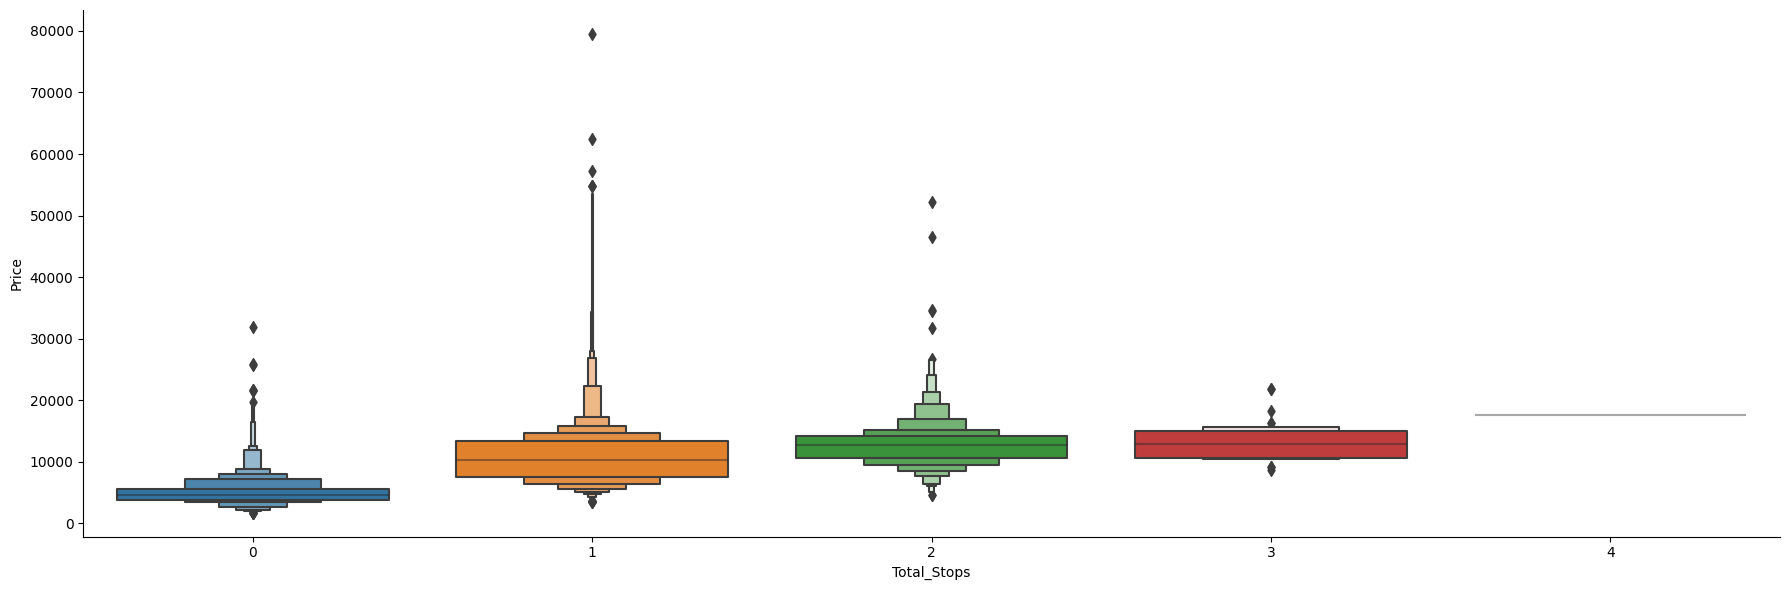

In [73]:
sns.catplot(y='Price', x='Total_Stops', data=final_data.sort_values('Price',ascending=False), kind='boxen', height=6, aspect=3)

In [74]:
final_data.head()

,journey_day,journey_month,dep_hour,dep_mins,arrival_day,arrival_hour,arrival_min,duration_hour,duration_min,Total_Stops,Price
0,24,3,22,20,22,1,10,2,50,0,3897
1,1,5,5,50,1,13,15,7,25,2,7662
2,9,6,9,25,10,4,25,19,0,2,13882
3,12,5,18,5,12,23,30,5,25,1,6218
4,1,3,16,50,1,21,35,4,45,1,13302


In [75]:
final_data.columns

Index(['journey_day', 'journey_month', 'dep_hour', 'dep_mins', 'arrival_day',
       'arrival_hour', 'arrival_min', 'duration_hour', 'duration_min',
       'Total_Stops', 'Price'],
      dtype='object')

In [76]:
journey = final_data.iloc[:,0:2]
rest = final_data.iloc[:,22:]
final_data = final_data.iloc[:,2:22]
final_data = pd.concat([final_data,journey,rest],axis=1)

- drop the above scaled features from final_data, so that no columns are repeated

In [77]:
final_data.columns

Index(['dep_hour', 'dep_mins', 'arrival_day', 'arrival_hour', 'arrival_min',
       'duration_hour', 'duration_min', 'Total_Stops', 'Price', 'journey_day',
       'journey_month'],
      dtype='object')

In [78]:
len(final_data.columns)

11

In [79]:
final_data.head()

,dep_hour,dep_mins,arrival_day,arrival_hour,arrival_min,duration_hour,duration_min,Total_Stops,Price,journey_day,journey_month
0,22,20,22,1,10,2,50,0,3897,24,3
1,5,50,1,13,15,7,25,2,7662,1,5
2,9,25,10,4,25,19,0,2,13882,9,6
3,18,5,12,23,30,5,25,1,6218,12,5
4,16,50,1,21,35,4,45,1,13302,1,3


- Split the final_data

In [80]:
# from sklearn.preprocessing import LabelEncoder
# final_data2=cleaned_data.copy()
# #Encode Airline, Source and Destination
# le = LabelEncoder()
# final_data2['Airline'] = le.fit_transform(final_data2['Airline'])
# final_data2['Source'] = le.fit_transform(final_data2['Source'])
# final_data2['Destination'] = le.fit_transform(final_data2['Destination'])
# final_data2

In [83]:
X = final_data.drop(['Price'],axis=1)
y = final_data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

# final_data2.drop(['Route'],axis=1,inplace=True)
# X = final_data2.drop(['Price'],axis=1)
# y = final_data2['Price']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [84]:
len(X_train.columns)

10

In [85]:
X_train.head()

,dep_hour,dep_mins,arrival_day,arrival_hour,arrival_min,duration_hour,duration_min,Total_Stops,journey_day,journey_month
1705,11,40,27,19,15,7,35,1,27,3
442,6,50,18,12,10,5,20,1,18,5
2483,22,50,22,4,25,5,35,1,21,5
333,20,25,12,23,5,2,40,0,12,3
4894,9,35,24,12,30,2,55,0,24,3


In [86]:
y_train.head()

1705     6953
442      6347
2483    12898
333      4148
4894     6205
Name: Price, dtype: int64

### Feature Selection

- using ***Pearson's correlation***

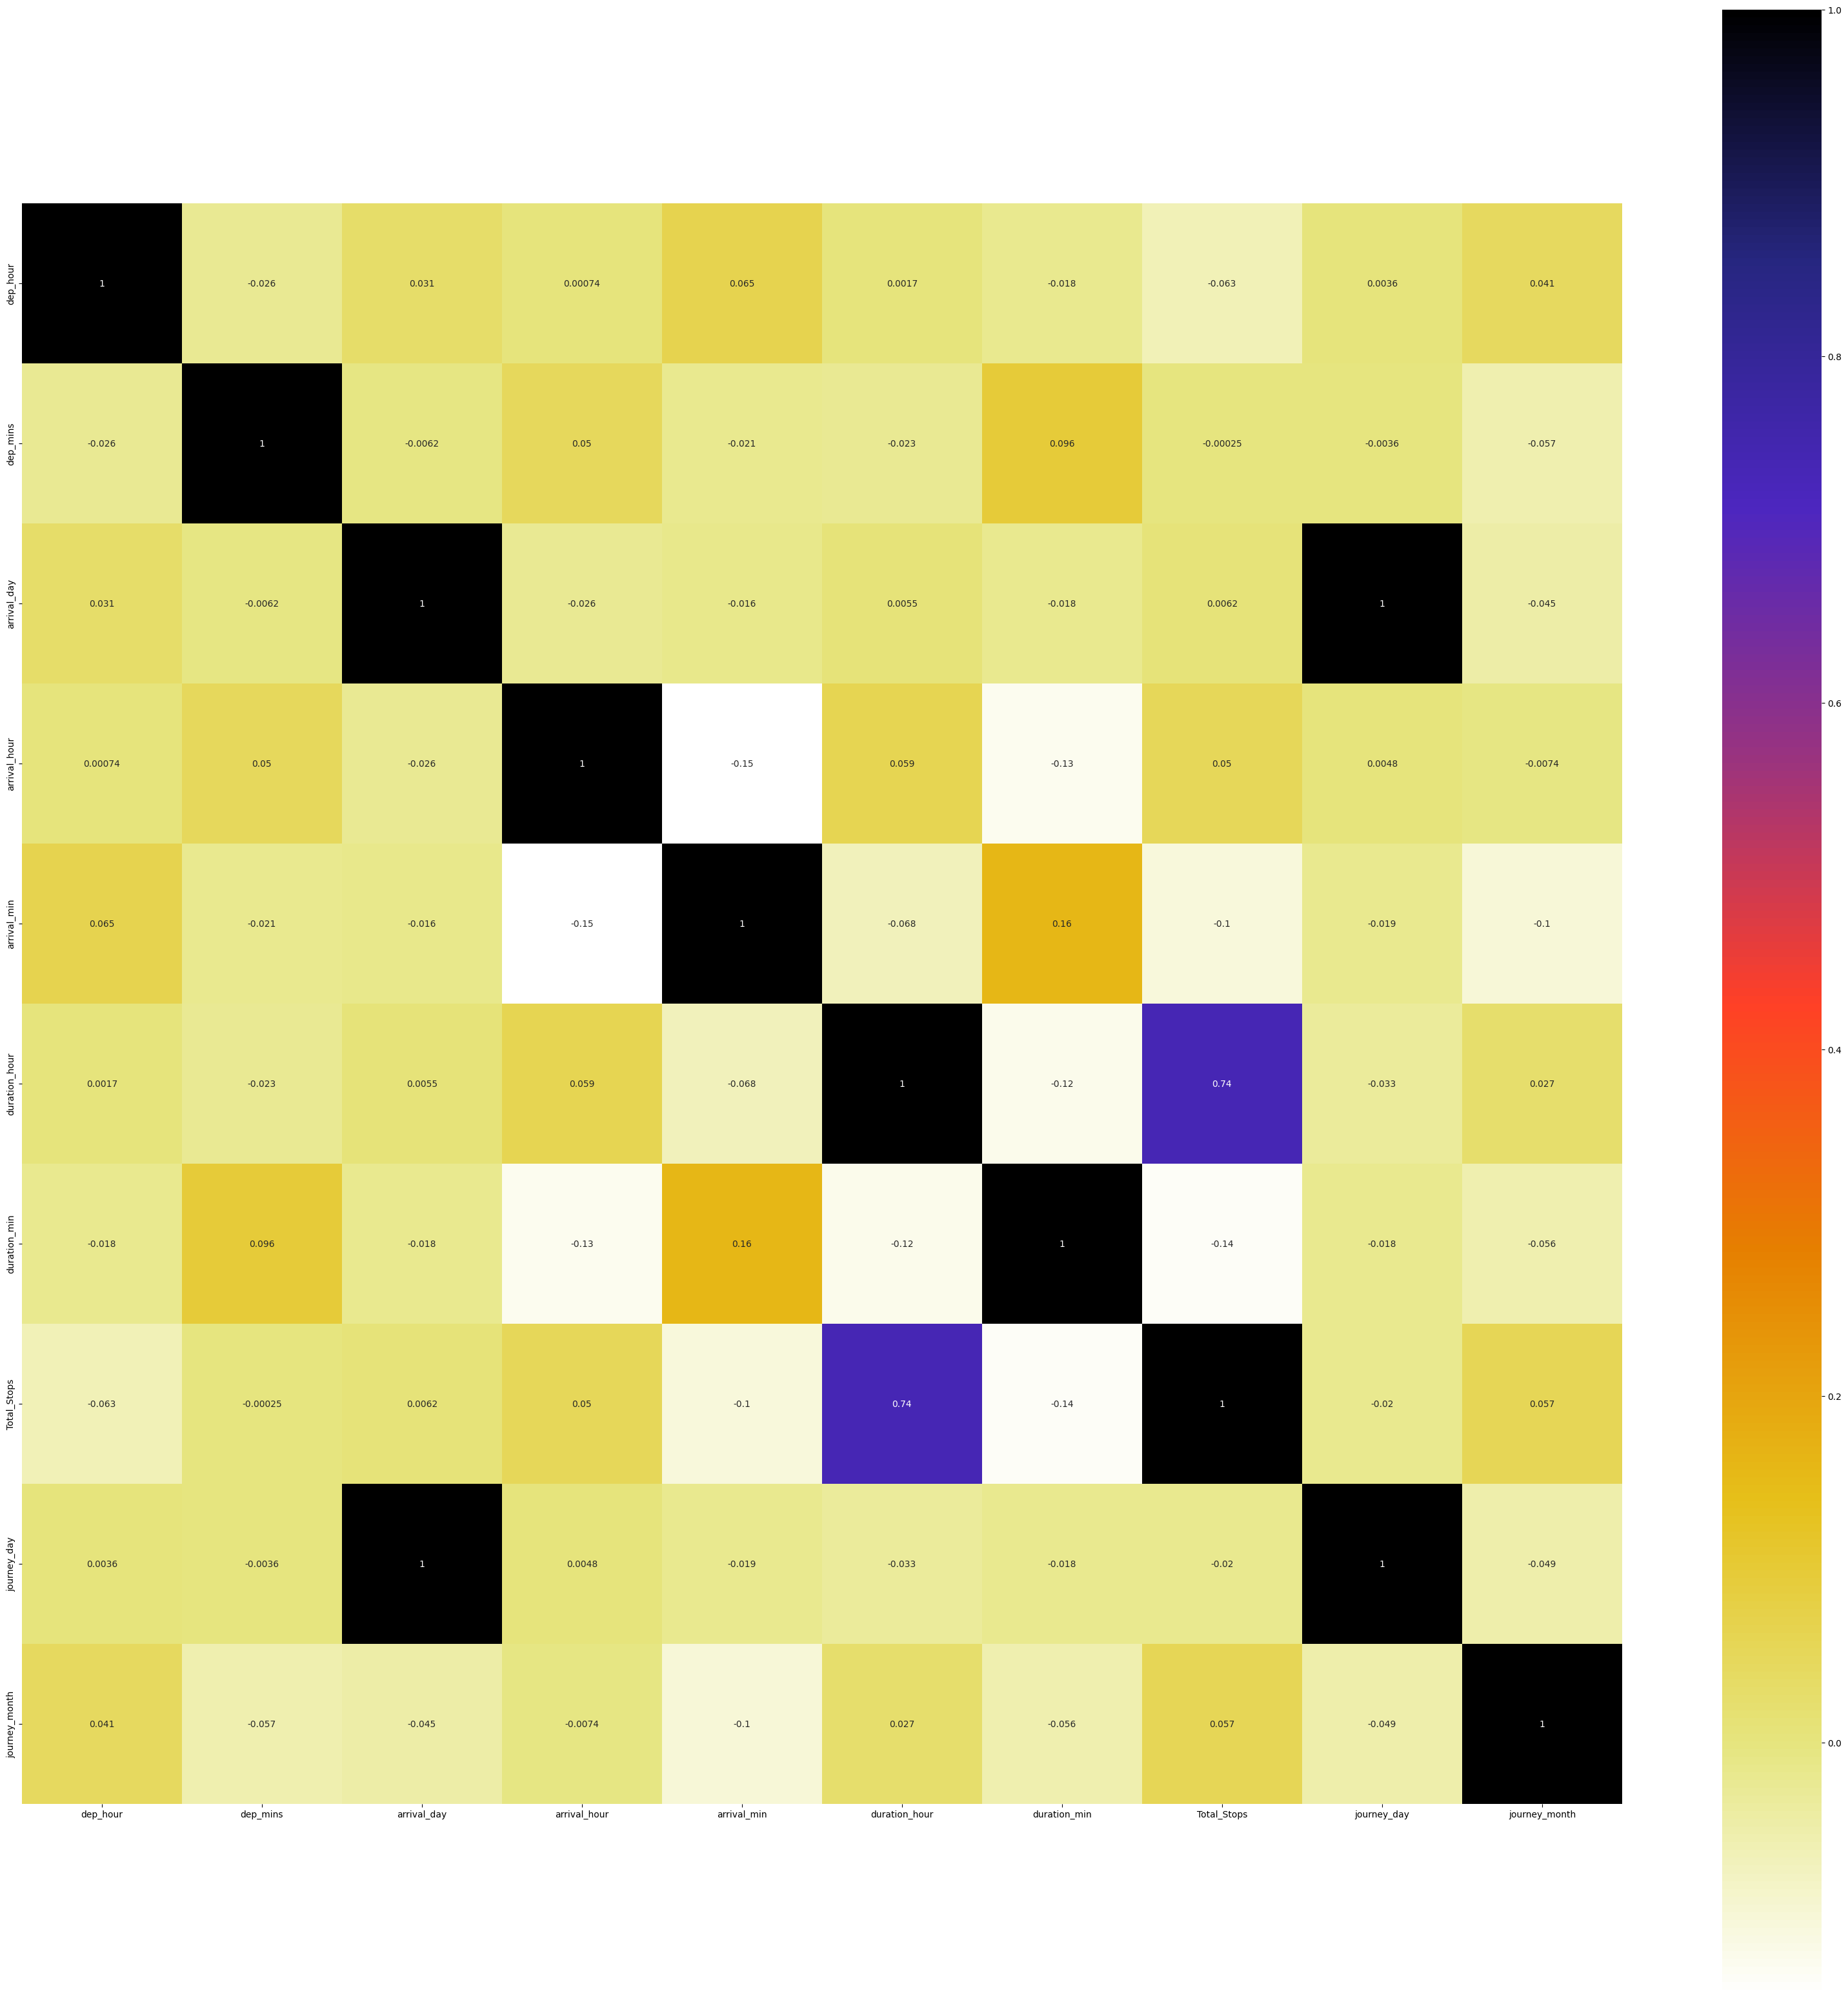

In [87]:
plt.figure(figsize=(40,40))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r, square=True)
plt.show()

In [88]:
def correlation(data, threshold):
#     set() is taken for avoiding duplicate column names!
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                column_name = corr_matrix.columns[i]
                col_corr.add(column_name)
    return col_corr

In [89]:
corr_feat = correlation(X_train, 0.85)
print(set(corr_feat))

{'journey_day'}


- **drop** those features have more than **90% correlation** with any other feature in the dataset
- but also at the same time the **Destination_** features cannot be dropped because their correlation with some of the features is due to **One Hot Encoding** since there can possibly be the same amount of two **Destinations** where planes can land.

In [90]:
X_train.drop(['arrival_day'],axis=1,inplace=True)
X_test.drop(['arrival_day'],axis=1,inplace=True)

In [91]:
X_train.head()

,dep_hour,dep_mins,arrival_hour,arrival_min,duration_hour,duration_min,Total_Stops,journey_day,journey_month
1705,11,40,19,15,7,35,1,27,3
442,6,50,12,10,5,20,1,18,5
2483,22,50,4,25,5,35,1,21,5
333,20,25,23,5,2,40,0,12,3
4894,9,35,12,30,2,55,0,24,3


In [92]:
X_test.head()

,dep_hour,dep_mins,arrival_hour,arrival_min,duration_hour,duration_min,Total_Stops,journey_day,journey_month
2857,5,30,22,0,16,30,2,6,3
3543,10,5,13,0,2,55,0,1,3
8198,2,55,4,20,1,25,0,6,6
1464,22,40,10,40,12,0,1,1,4
5444,6,0,8,45,2,45,0,3,4


## Train and fit the model

- using RandomForest regressor

- find best random_state for RandomForest regressor

In [93]:
def best_rand_state_rf(X_train, y_train, X_test, y_test, random_state):
    reg = RandomForestRegressor(random_state = random_state)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    return rmse

In [94]:
min_rmse = 1e9
best_rand_state = 0
for i in range(0,100):
    rmse = best_rand_state_rf(X_train, y_train, X_test, y_test, i)
    if min_rmse > rmse:
        min_rmse = rmse
        best_rand_state = i
print(min_rmse, best_rand_state)

2151.61414723092 34


In [95]:
reg_rf = RandomForestRegressor(random_state=best_rand_state)
reg_rf.fit(X_train,y_train)
y_pred = reg_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

2151.61414723092

### Score1: without hyper parameter tuning

In [96]:
# print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
score = r2_score(y_test,y_pred)
print(score)
print(reg_rf.score(X_test, y_test))

0.7793575043483448
0.7793575043483448


### Hyper parameter tuning
1. Randomized Search CV
2. GridSearch CV

1. **Randomized Search CV**

In [97]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in the RandomForest
n_estimators = [int(x) for x in np.linspace(start=100, stop=500, num=5)]
# number of features to consider at each split
max_features = ['auto', 'sqrt','log2']
# max. no. of levels in tree
max_depth = [int(x) for x in np.linspace(10, 500, 5)]
# min. no. of samples required to split the node
min_sample_split = [2, 5, 8, 11]
# min. no. of samples required at each leaf node
min_sample_leaf = [1, 2, 4, 6]
# create a RandomGrid
RandomGrid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_sample_split,
    'min_samples_leaf': min_sample_leaf,
}
print(RandomGrid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 132, 255, 377, 500], 'min_samples_split': [2, 5, 8, 11], 'min_samples_leaf': [1, 2, 4, 6]}


In [98]:
rf_randomcv=RandomizedSearchCV(estimator=reg_rf,param_distributions=RandomGrid,n_iter=10,cv=5,verbose=2,
                               random_state=100,n_jobs=1)

In [99]:
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=377, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=300; total time=   0.0s
[CV] END max_depth=377, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=300; total time=   0.0s
[CV] END max_depth=377, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=300; total time=   0.0s
[CV] END max_depth=377, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=300; total time=   0.0s
[CV] END max_depth=377, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=11, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=11, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=11, n_estima

[CV] END max_depth=132, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=132, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=132, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=132, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=132, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=400; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=400; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=400; total time=   0.0s
[CV] END max_depth=10, max_features

/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/base.py", line 637, in _validate_params
    val

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=34),
                   n_jobs=1,
                   param_distributions={'max_depth': [10, 132, 255, 377, 500],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 8, 11],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=100, verbose=2)

In [100]:
rf_randomcv.best_params_

{'n_estimators': 300,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 377}

In [101]:
reg_rf_best = RandomForestRegressor(n_estimators=300, min_samples_split=8, min_samples_leaf=2, max_features='sqrt', max_depth=377)
reg_rf_best.fit(X_train, y_train)
y_pred = reg_rf_best.predict(X_test)

### Score2: with RandomizedSearch CV

In [102]:
print('Mean absolute error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
score = r2_score(y_test,y_pred)
print('Accuracy of the model:', score)

Mean absolute error:  1387.7535364151815
Mean squared error:  4358323.033097379
Root mean squared error:  2087.6597024173693
Accuracy of the model: 0.7922792915303585


2. **GridSearch CV**

In [103]:
rf_randomcv.best_params_

{'n_estimators': 300,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 377}

In [104]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [rf_randomcv.best_params_['n_estimators']-200, 
                     rf_randomcv.best_params_['n_estimators']-100,
                     rf_randomcv.best_params_['n_estimators']],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split']-1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split']+1],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'max_depth': [rf_randomcv.best_params_['max_depth']-5,
                 rf_randomcv.best_params_['max_depth'],
                 rf_randomcv.best_params_['max_depth']+5]
}

print(param_grid)

{'n_estimators': [100, 200, 300], 'min_samples_split': [7, 8, 9], 'min_samples_leaf': [2], 'max_features': ['log2'], 'max_depth': [372, 377, 382]}


In [105]:
rf_reg_grid = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_reg_grid, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[CV] END max_depth=372, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   0.4s
[CV] END max_depth=372, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   0.3s
[CV] END max_depth=372, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   0.4s
[CV] END max_depth=372, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=200; total time=   0.7s
[CV] END max_depth=372, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=200; total time=   0.7s
[CV] END max_depth=372, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=200; total time=   0.7s
[CV] END max_depth=372, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=300; total time=   1.0s
[CV] END max_depth=372, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=300; total time=   1.1s
[CV] END max_depth=372, max_feat

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [372, 377, 382], 'max_features': ['log2'],
                         'min_samples_leaf': [2],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [106]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=377, max_features='log2', min_samples_leaf=2,
                      min_samples_split=7, n_estimators=200)

In [107]:
best_grid = grid_search.best_estimator_

### Score3: final score; with GridSearch CV

In [108]:
y_pred = best_grid.predict(X_test)
r2_score(y_test, y_pred)

0.7918169802087656

### Save the model for reuse

In [109]:
reg_rf_final = best_grid

In [110]:
import pickle
# open a file to store the data into
file = open('flight_rf_reg.pkl', 'wb')
# dump the info. into file
pickle.dump(reg_rf_final, file)

In [111]:
model = open('flight_rf_reg.pkl', 'rb')
forest_model = pickle.load(model)

In [112]:
y_prediction = forest_model.predict(X_test)

In [113]:
metrics.r2_score(y_test, y_prediction)

0.7918169802087656

- Converting the y_test & y_pred into dataFrames to analyse the their variation in a join plot

In [114]:
test_price = y_test
test_price.name = 'test_price'
test_price = test_price.reset_index()

In [115]:
test_price.drop(['index'], axis=1, inplace=True)

In [116]:
test_price

,test_price
0,9678
1,10067
2,4050
3,5192
4,7229
...,...
3200,13502
3201,12351
3202,16736
3203,13547


In [117]:
pred_price = pd.Series(y_prediction)
pred_price.name = 'pred_price'
pred_price = pred_price.reset_index()

In [118]:
pred_price.drop(['index'], axis=1, inplace=True)
pred_price

,pred_price
0,12662.349896
1,12715.545448
2,4612.315797
3,10334.558824
4,5612.114393
...,...
3200,14599.626416
3201,13096.179920
3202,15738.947965
3203,12268.009499


In [119]:
data_test_pred = pd.concat([test_price, pred_price], axis=1)
data_test_pred.head()

,test_price,pred_price
0,9678,12662.349896
1,10067,12715.545448
2,4050,4612.315797
3,5192,10334.558824
4,7229,5612.114393


/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soumik/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future v

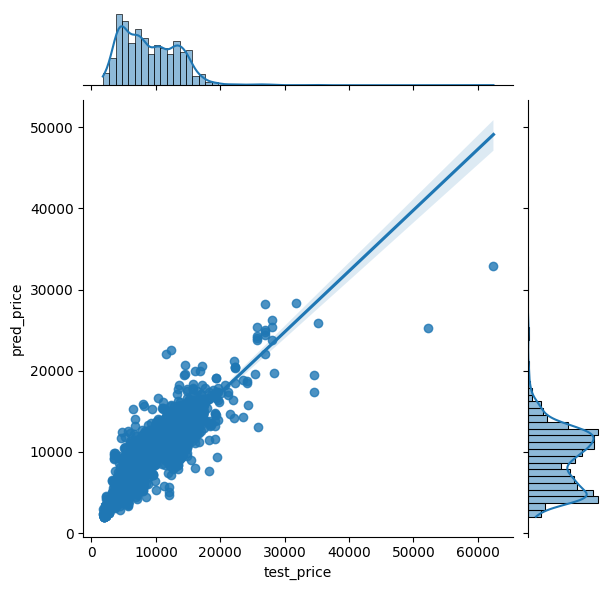

In [120]:
sns.jointplot(x='test_price', y='pred_price', data=data_test_pred, kind='reg')

In [126]:
labelEncoder=open('labelEncoder.pkl','wb')
pickle.dump(le,labelEncoder)
labelEncoder.close()

In [128]:
X_train

,dep_hour,dep_mins,arrival_hour,arrival_min,duration_hour,duration_min,Total_Stops,journey_day,journey_month
1705,11,40,19,15,7,35,1,27,3
442,6,50,12,10,5,20,1,18,5
2483,22,50,4,25,5,35,1,21,5
333,20,25,23,5,2,40,0,12,3
4894,9,35,12,30,2,55,0,24,3
...,...,...,...,...,...,...,...,...,...
5876,18,25,4,25,10,0,2,15,6
866,18,5,21,10,3,5,0,15,3
7696,14,30,12,30,22,0,2,9,5
74,5,5,10,5,5,0,1,21,3
